In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X = pd.read_csv("labeled_students_score.csv")
X

,index,Unnamed: 0,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,...,LunchType_free/reduced,LunchType_standard,EthnicGroup_Label,ParentEduc_Label,TestPrep_Label,ParentMaritalStatus_Label,PracticeSport_Label,IsFirstChild_Label,TransportMeans_Label,WklyStudyHours_Label
0,0,0,520645,female,group C,bachelor's degree,standard,none,married,regularly,...,0.0,1.0,2,1,1,1,1,1,1,1
1,1,1,303683,female,group C,some college,standard,none,married,sometimes,...,0.0,1.0,2,5,1,1,2,1,2,0
2,2,2,457351,female,group B,master's degree,standard,none,single,sometimes,...,0.0,1.0,1,3,1,2,2,1,1,1
3,3,3,812988,male,group A,associate's degree,free/reduced,none,married,never,...,1.0,0.0,0,0,1,1,0,0,2,0
4,4,4,594678,male,group C,some college,standard,none,married,sometimes,...,0.0,1.0,2,5,1,1,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,30636,816,611241,female,group D,high school,standard,none,single,sometimes,...,0.0,1.0,3,2,1,2,2,0,1,0
29113,30637,890,299810,male,group E,high school,standard,none,single,regularly,...,0.0,1.0,4,2,1,2,1,0,0,0
29114,30638,911,941589,female,group C,high school,free/reduced,completed,married,sometimes,...,1.0,0.0,2,2,0,1,2,0,0,0
29115,30639,934,867225,female,group D,associate's degree,standard,completed,married,regularly,...,0.0,1.0,3,0,0,1,1,0,1,0


1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

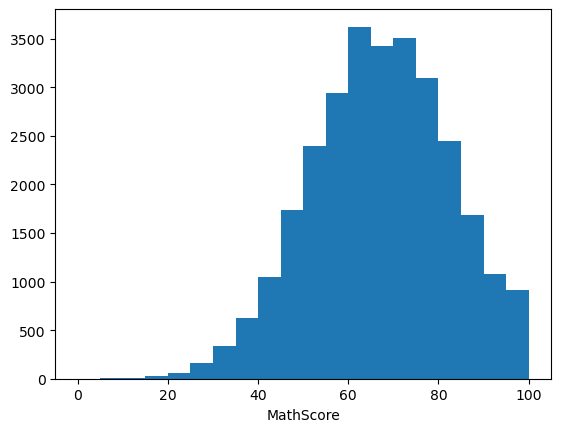

In [4]:
plt.hist(X.MathScore, bins=20)
plt.xlabel('MathScore')
plt.show()

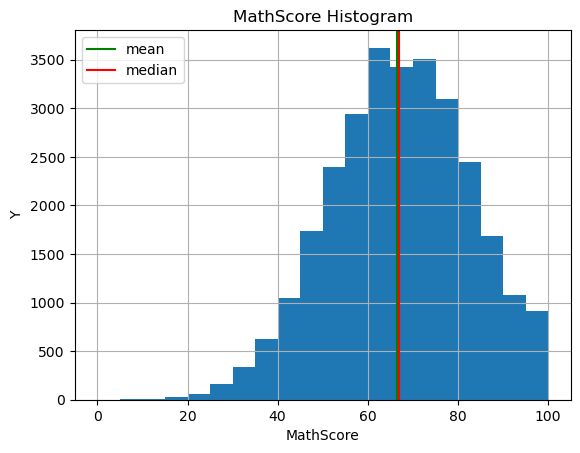

In [5]:
plt.hist(X.MathScore, bins=20)
plt.axvline(X.MathScore.mean(), color = "green", label = "mean")
plt.axvline(X.MathScore.median(), color = "red", label = "median")
plt.title("MathScore Histogram")
plt.grid()
plt.legend(loc='upper left')
plt.xlabel("MathScore")
plt.ylabel("Y")
plt.show()

2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

3. a) Make a pie chart of the feature NrSiblings.
b) Display the labels for each wedge.
c) Display the percentages within edge wedge.
d) Title the figure "NrSiblings pie chart".

count_per_score = X.groupby('ReadingScore').count().loc[:,'ParentEduc'].values score_name = X.groupby('ReadingScore').count().index.values plt.bar(score_name, count_per_score) plt.show()

In [6]:
siblings = X.groupby('NrSiblings').count().index.values
print(siblings)

[ 0.  1.  2.  3.  4.  5.  6.  7. 10. 12. 26.]


In [7]:
nr_siblings = X['NrSiblings']
count_per_sibling = X.groupby('NrSiblings').count().loc[:,"StudentId"]
print(count_per_sibling)

NrSiblings
0.0     2860
1.0     7818
2.0     7954
3.0     5853
4.0     2794
5.0     1265
6.0      289
7.0      281
10.0       1
12.0       1
26.0       1
Name: StudentId, dtype: int64


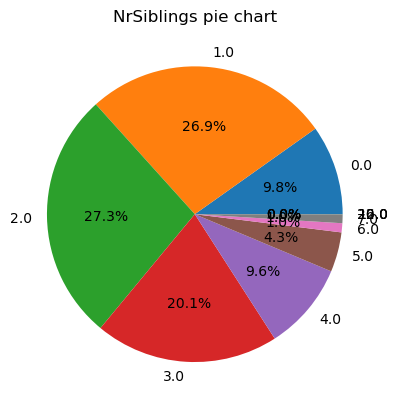

In [8]:
nr_siblings = X['NrSiblings']
count_per_sibling = X.groupby('NrSiblings').count().loc[:,"StudentId"]
sibling_name = X.groupby('NrSiblings').count().index.values
percent = (count_per_sibling/len(X))*100

plt.pie(percent, labels=sibling_name, autopct='%.1f%%')
plt.title('NrSiblings pie chart')

plt.show()

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group.
b) Color each bar in a different color. Set the transparency of the bars to 0.7
c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

ParentEduc
associate's degree     71.176203
bachelor's degree      73.106178
high school            67.235435
master's degree        75.883490
no formal education    69.262248
some college           69.160253
some high school       65.477055
Name: ReadingScore, dtype: float64
14.760190310681109


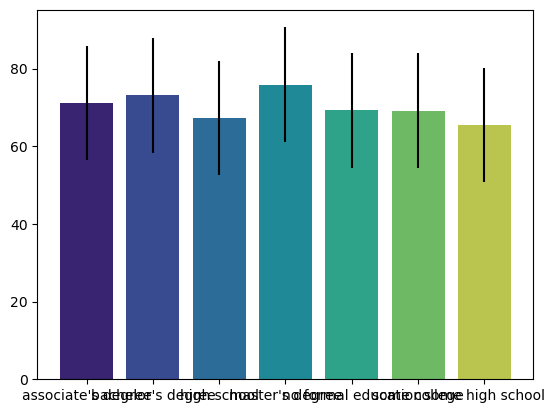

In [9]:
title_name = X.groupby('ParentEduc').count().index.values
average_score = X.groupby("ParentEduc")['ReadingScore'].mean()
print(average_score)

plt.bar(title_name, average_score)

colors = plt.cm.viridis(np.linspace(0, 1, len(average_score)))
standard_dev = X['ReadingScore'].std()
print(standard_dev)
plt.bar(title_name, average_score, yerr=standard_dev, color=colors, alpha=0.7)
plt.show()

5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore. 
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

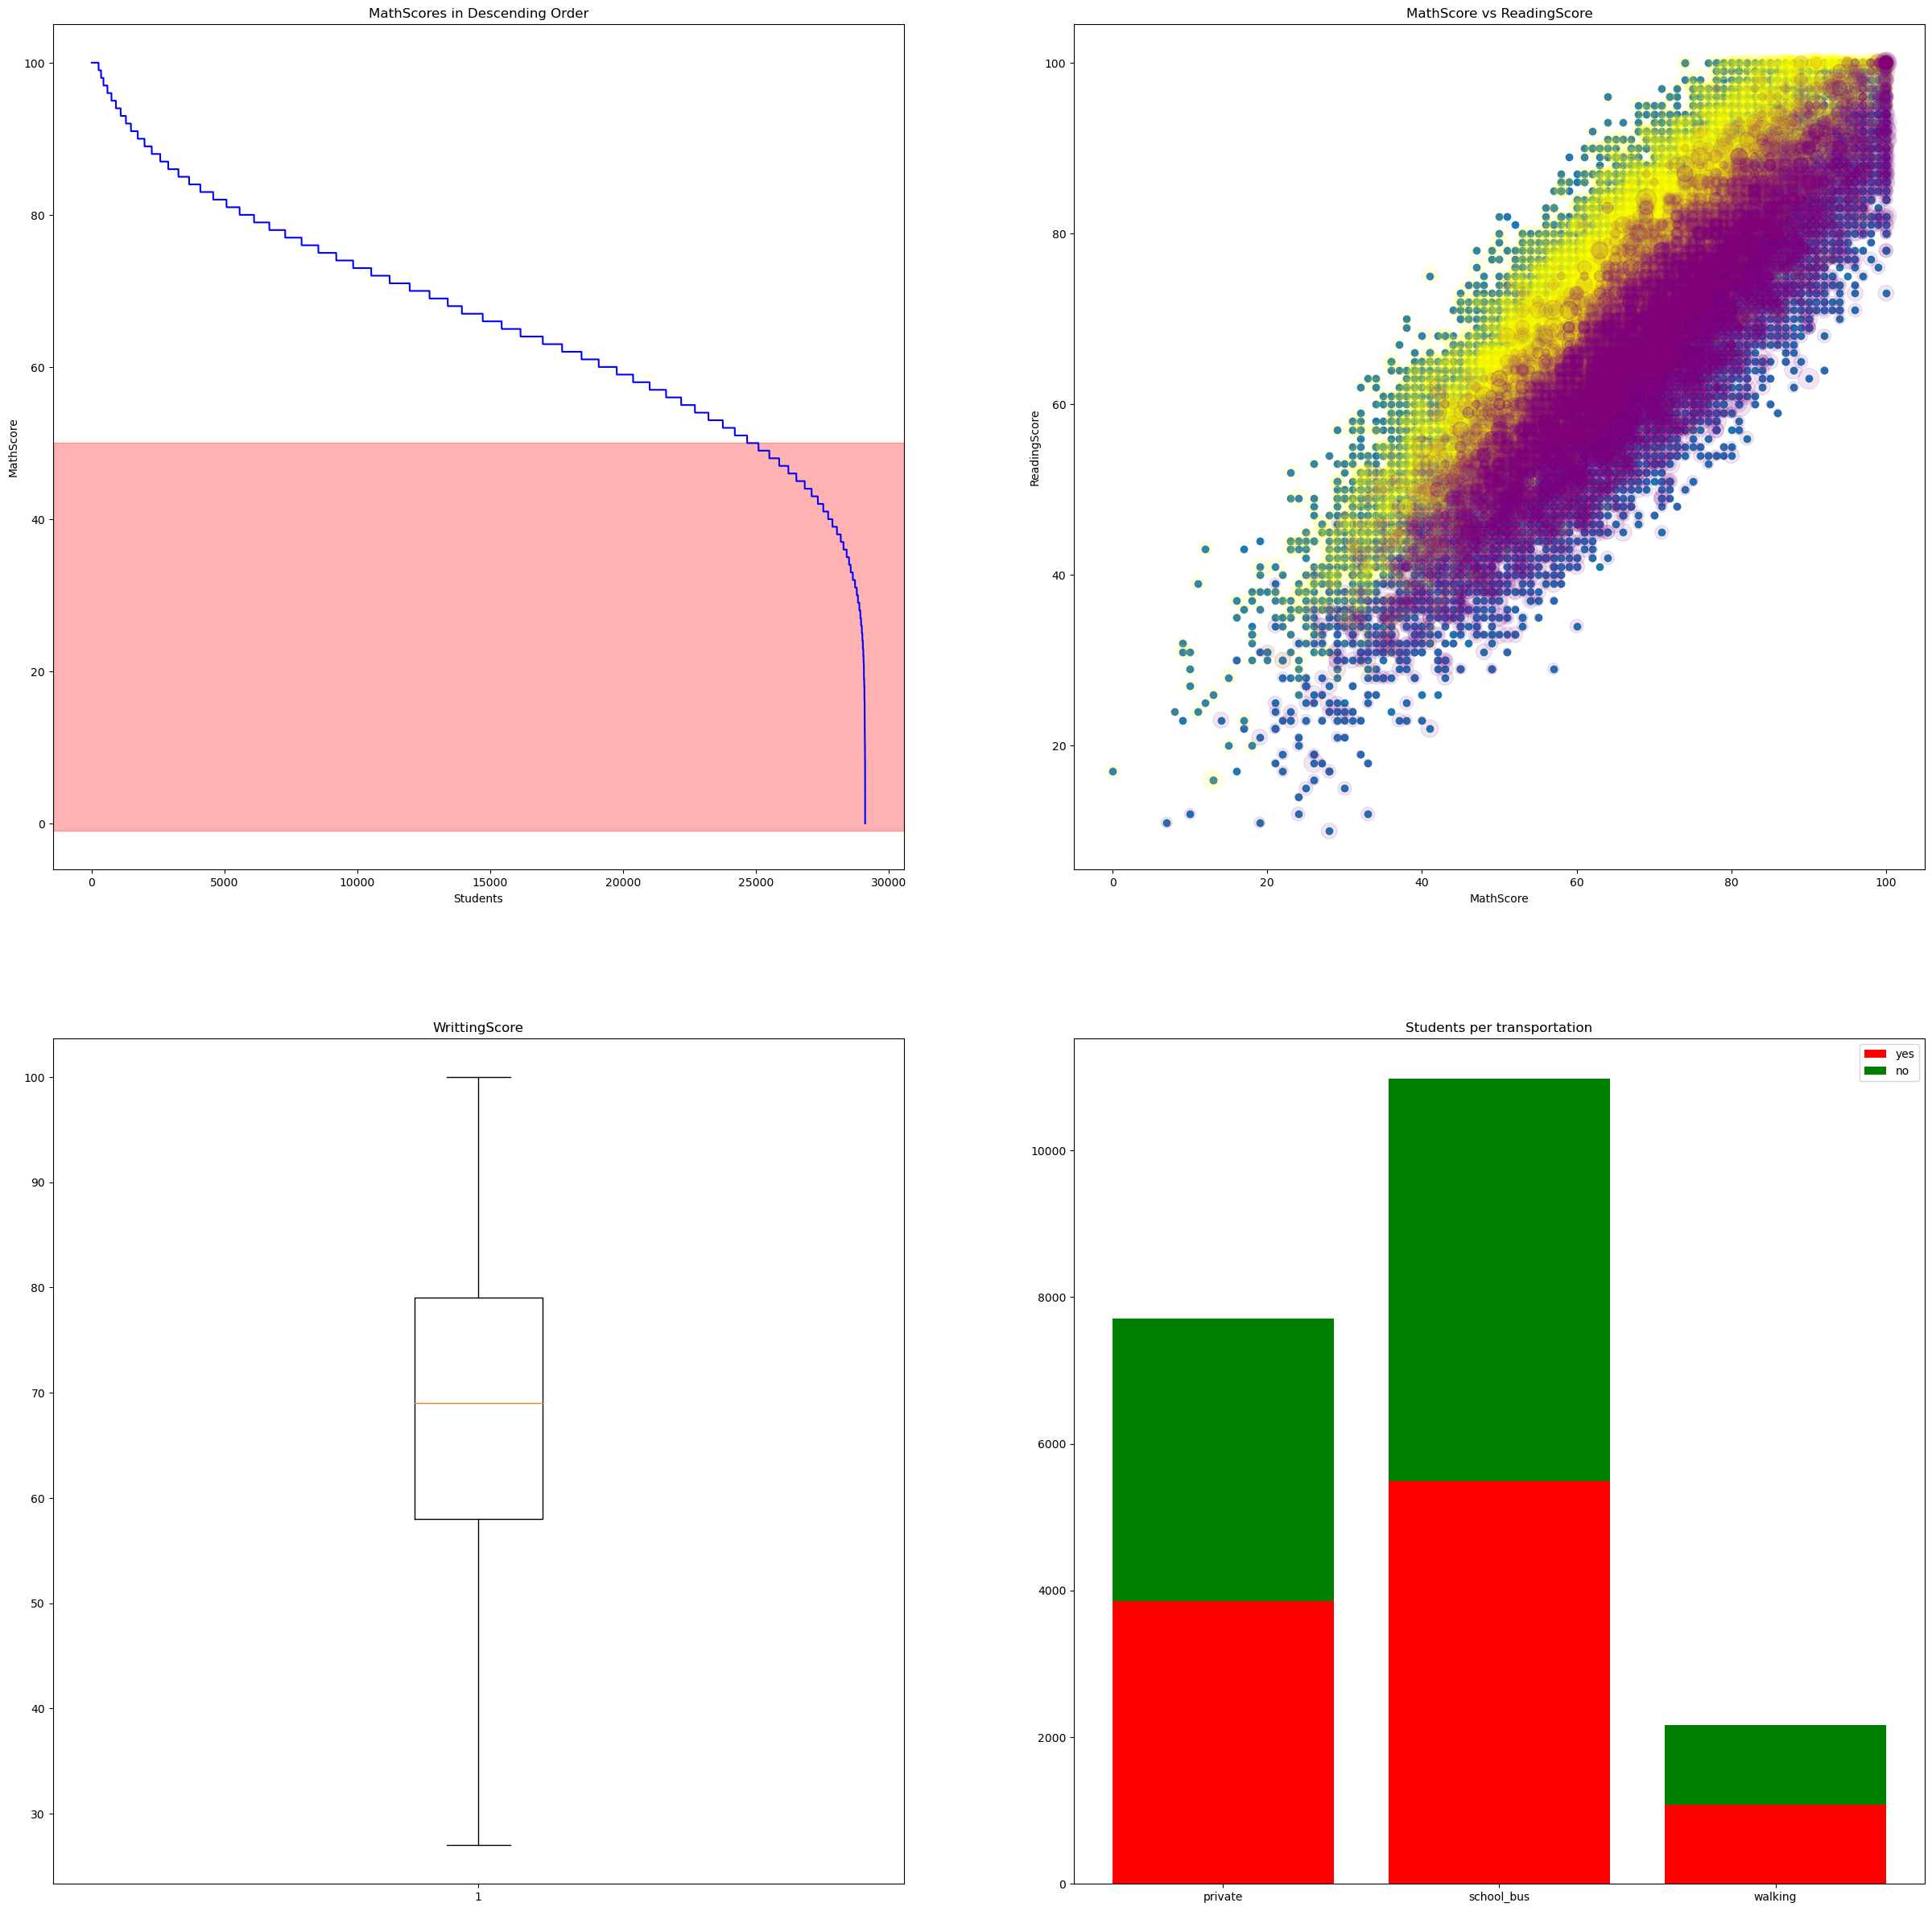

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(30, 30))

#b) In the top left axis: 1) Draw a line graph of the students' MathScores in descending order. 
#2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.



ax[0,0].plot(X['MathScore'].sort_values(ascending=False).values, color='blue')
ax[0,0].axhspan(-1, 50, color='red', alpha=0.3)
ax[0,0].title.set_text('MathScores in Descending Order')
ax[0,0].set_xlabel('Students')
ax[0,0].set_ylabel('MathScore')


# 1) Draw a scatter plot of MathScore vs ReadingScore.
#2) Make the bubbles representing the female students yellow and the ones representing the male students purple. 
#Add and display labels. Set transparency to 0.1
# 3) Set the size of the bubbles to be 50*NrSiblings. 

mask_female = X['Gender'] == 'female'
mask_male = X['Gender'] == 'male'
sizes = X.NrSiblings*50
ax[0,1].scatter(X.MathScore, X.ReadingScore)
ax[0,1].scatter(X.loc[mask_female, 'MathScore'], X.loc[mask_female, 'ReadingScore'], color='yellow', alpha=0.1, label='Female', s=sizes[mask_female])
ax[0,1].scatter(X.loc[mask_male, 'MathScore'], X.loc[mask_male, 'ReadingScore'], color='purple', alpha=0.1, label='Male', s=sizes[mask_male])

ax[0,1].set_xlabel('MathScore')
ax[0,1].set_ylabel('ReadingScore')
ax[0,1].title.set_text("MathScore vs ReadingScore")

#d) In the bottom left axis: 
#1) Draw a boxplot of the WrittingScore feature values. 2) Remove fliers from the boxplot. 

ax[1,0].boxplot(X.WritingScore, showfliers=False)
ax[1,0].title.set_text("WrittingScore")

#e) In the borrom right axis: 1) Draw a bar plot of the number of students using each transportation method. 
#2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren 
#in red and the ones who arent in blue. 
#Add and display labels.

title_name = X.groupby('TransportMeans').count().index.values

mask_yes = X['IsFirstChild'] == 'yes'
mask_no = X['IsFirstChild'] == 'no'

count_per_yes = X.loc[~mask_yes,:].groupby('TransportMeans').count().loc[:,'IsFirstChild'].values
count_per_no = X.loc[mask_no,:].groupby('TransportMeans').count().loc[:,'IsFirstChild'].values

# plot
ax[1,1].bar(title_name, count_per_yes, color='red', label='yes')
ax[1,1].bar(title_name, count_per_no, color='green', label='no', bottom=count_per_no)
ax[1,1].legend(loc='best')
ax[1,1].title.set_text("Students per transportation")

plt.show()

6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

In [74]:
column_names = X.columns.tolist()
print(column_names)

['index', 'Unnamed: 0', 'StudentId', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore', 'Gender_female', 'Gender_male', 'LunchType_free/reduced', 'LunchType_standard', 'EthnicGroup_Label', 'ParentEduc_Label', 'TestPrep_Label', 'ParentMaritalStatus_Label', 'PracticeSport_Label', 'IsFirstChild_Label', 'TransportMeans_Label', 'WklyStudyHours_Label']


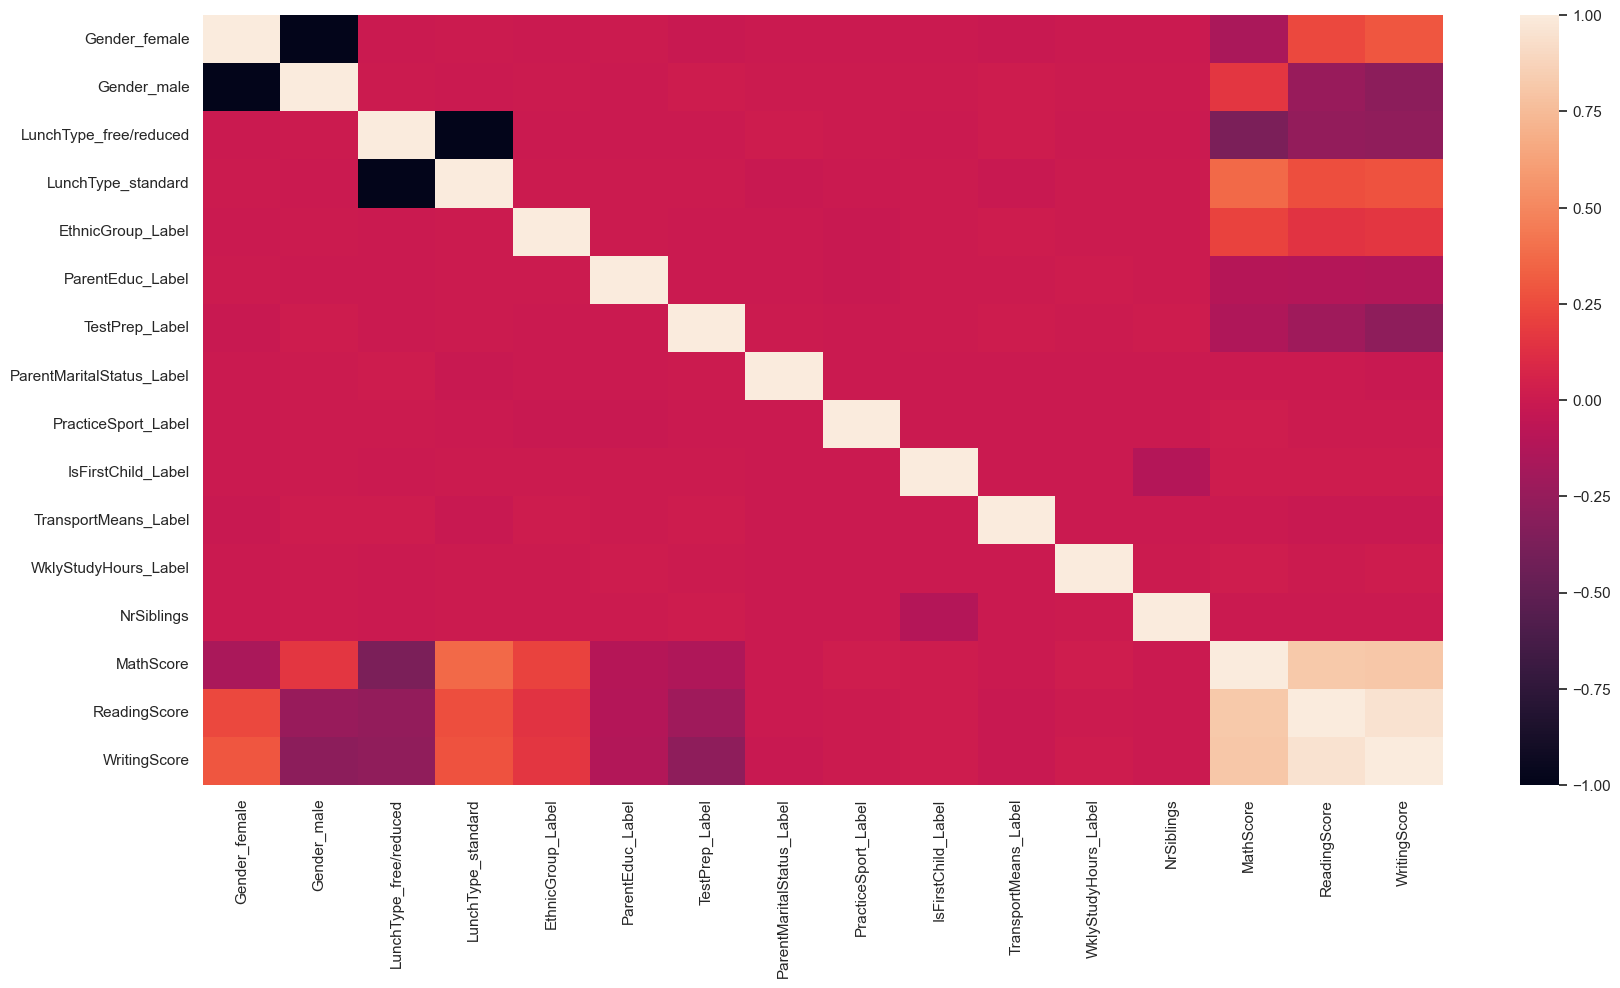

In [77]:
X_cleaned = pd.read_csv("cleaned_students_score.csv")
sns.heatmap(X_cleaned.drop("StudentId", axis=1).corr())
plt.show()

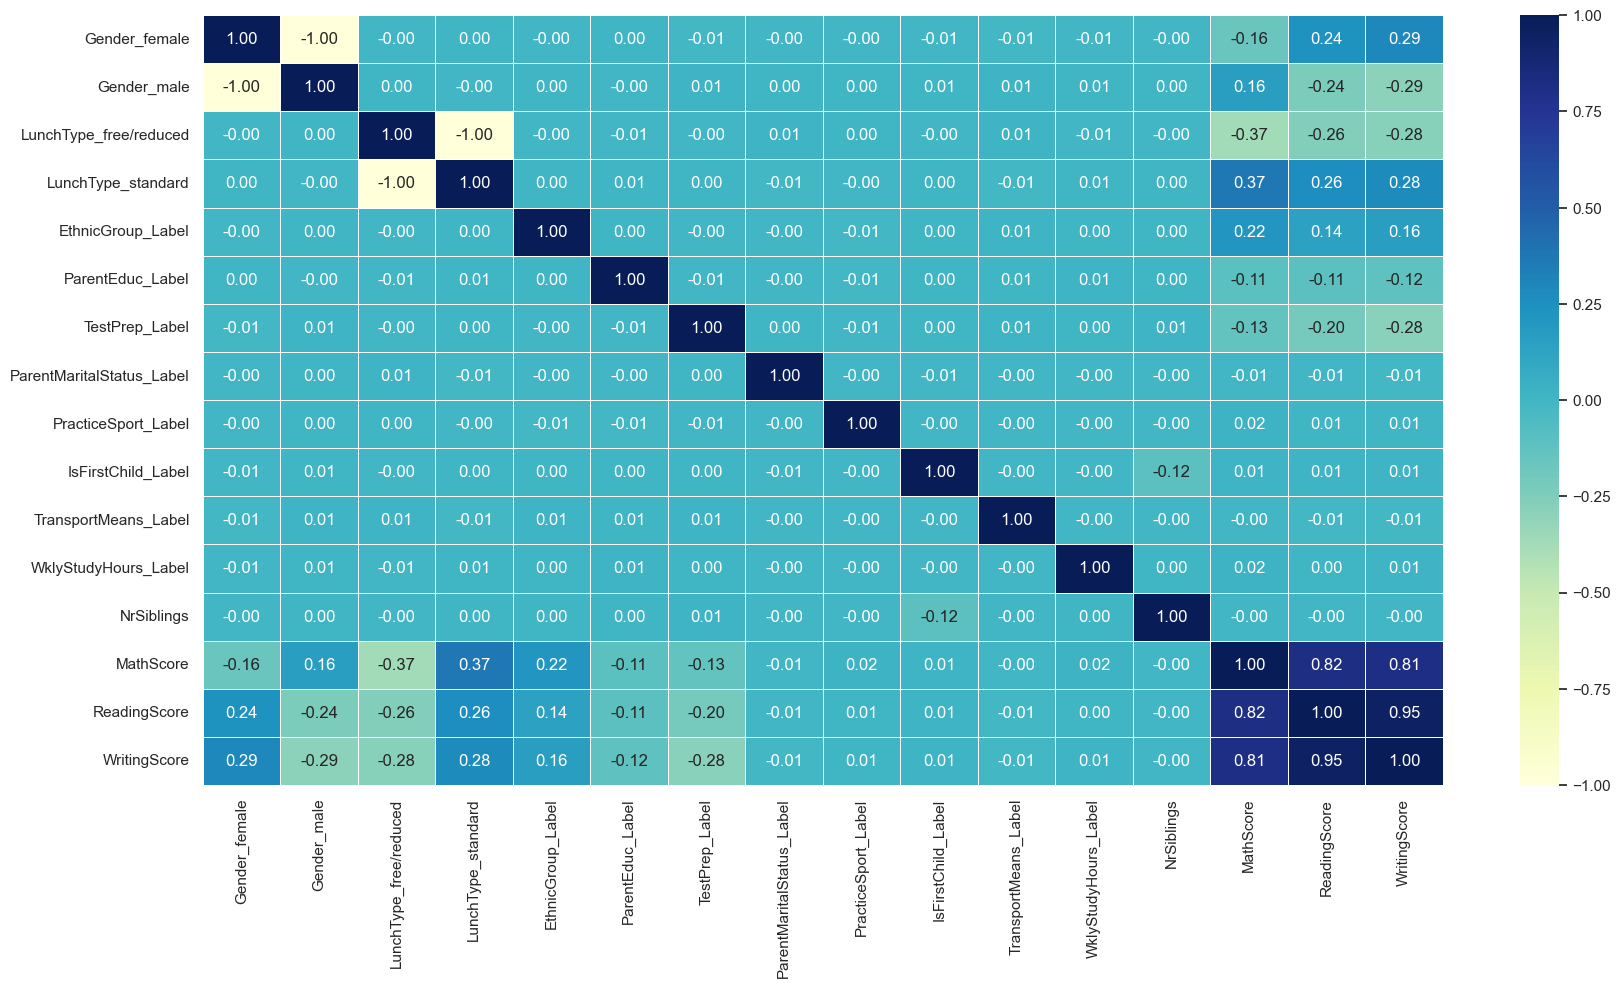

In [80]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_cleaned.drop("StudentId", axis=1).corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
sns.color_palette("icefire", as_cmap=True)
plt.show()

7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

C:\Users\mirna\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


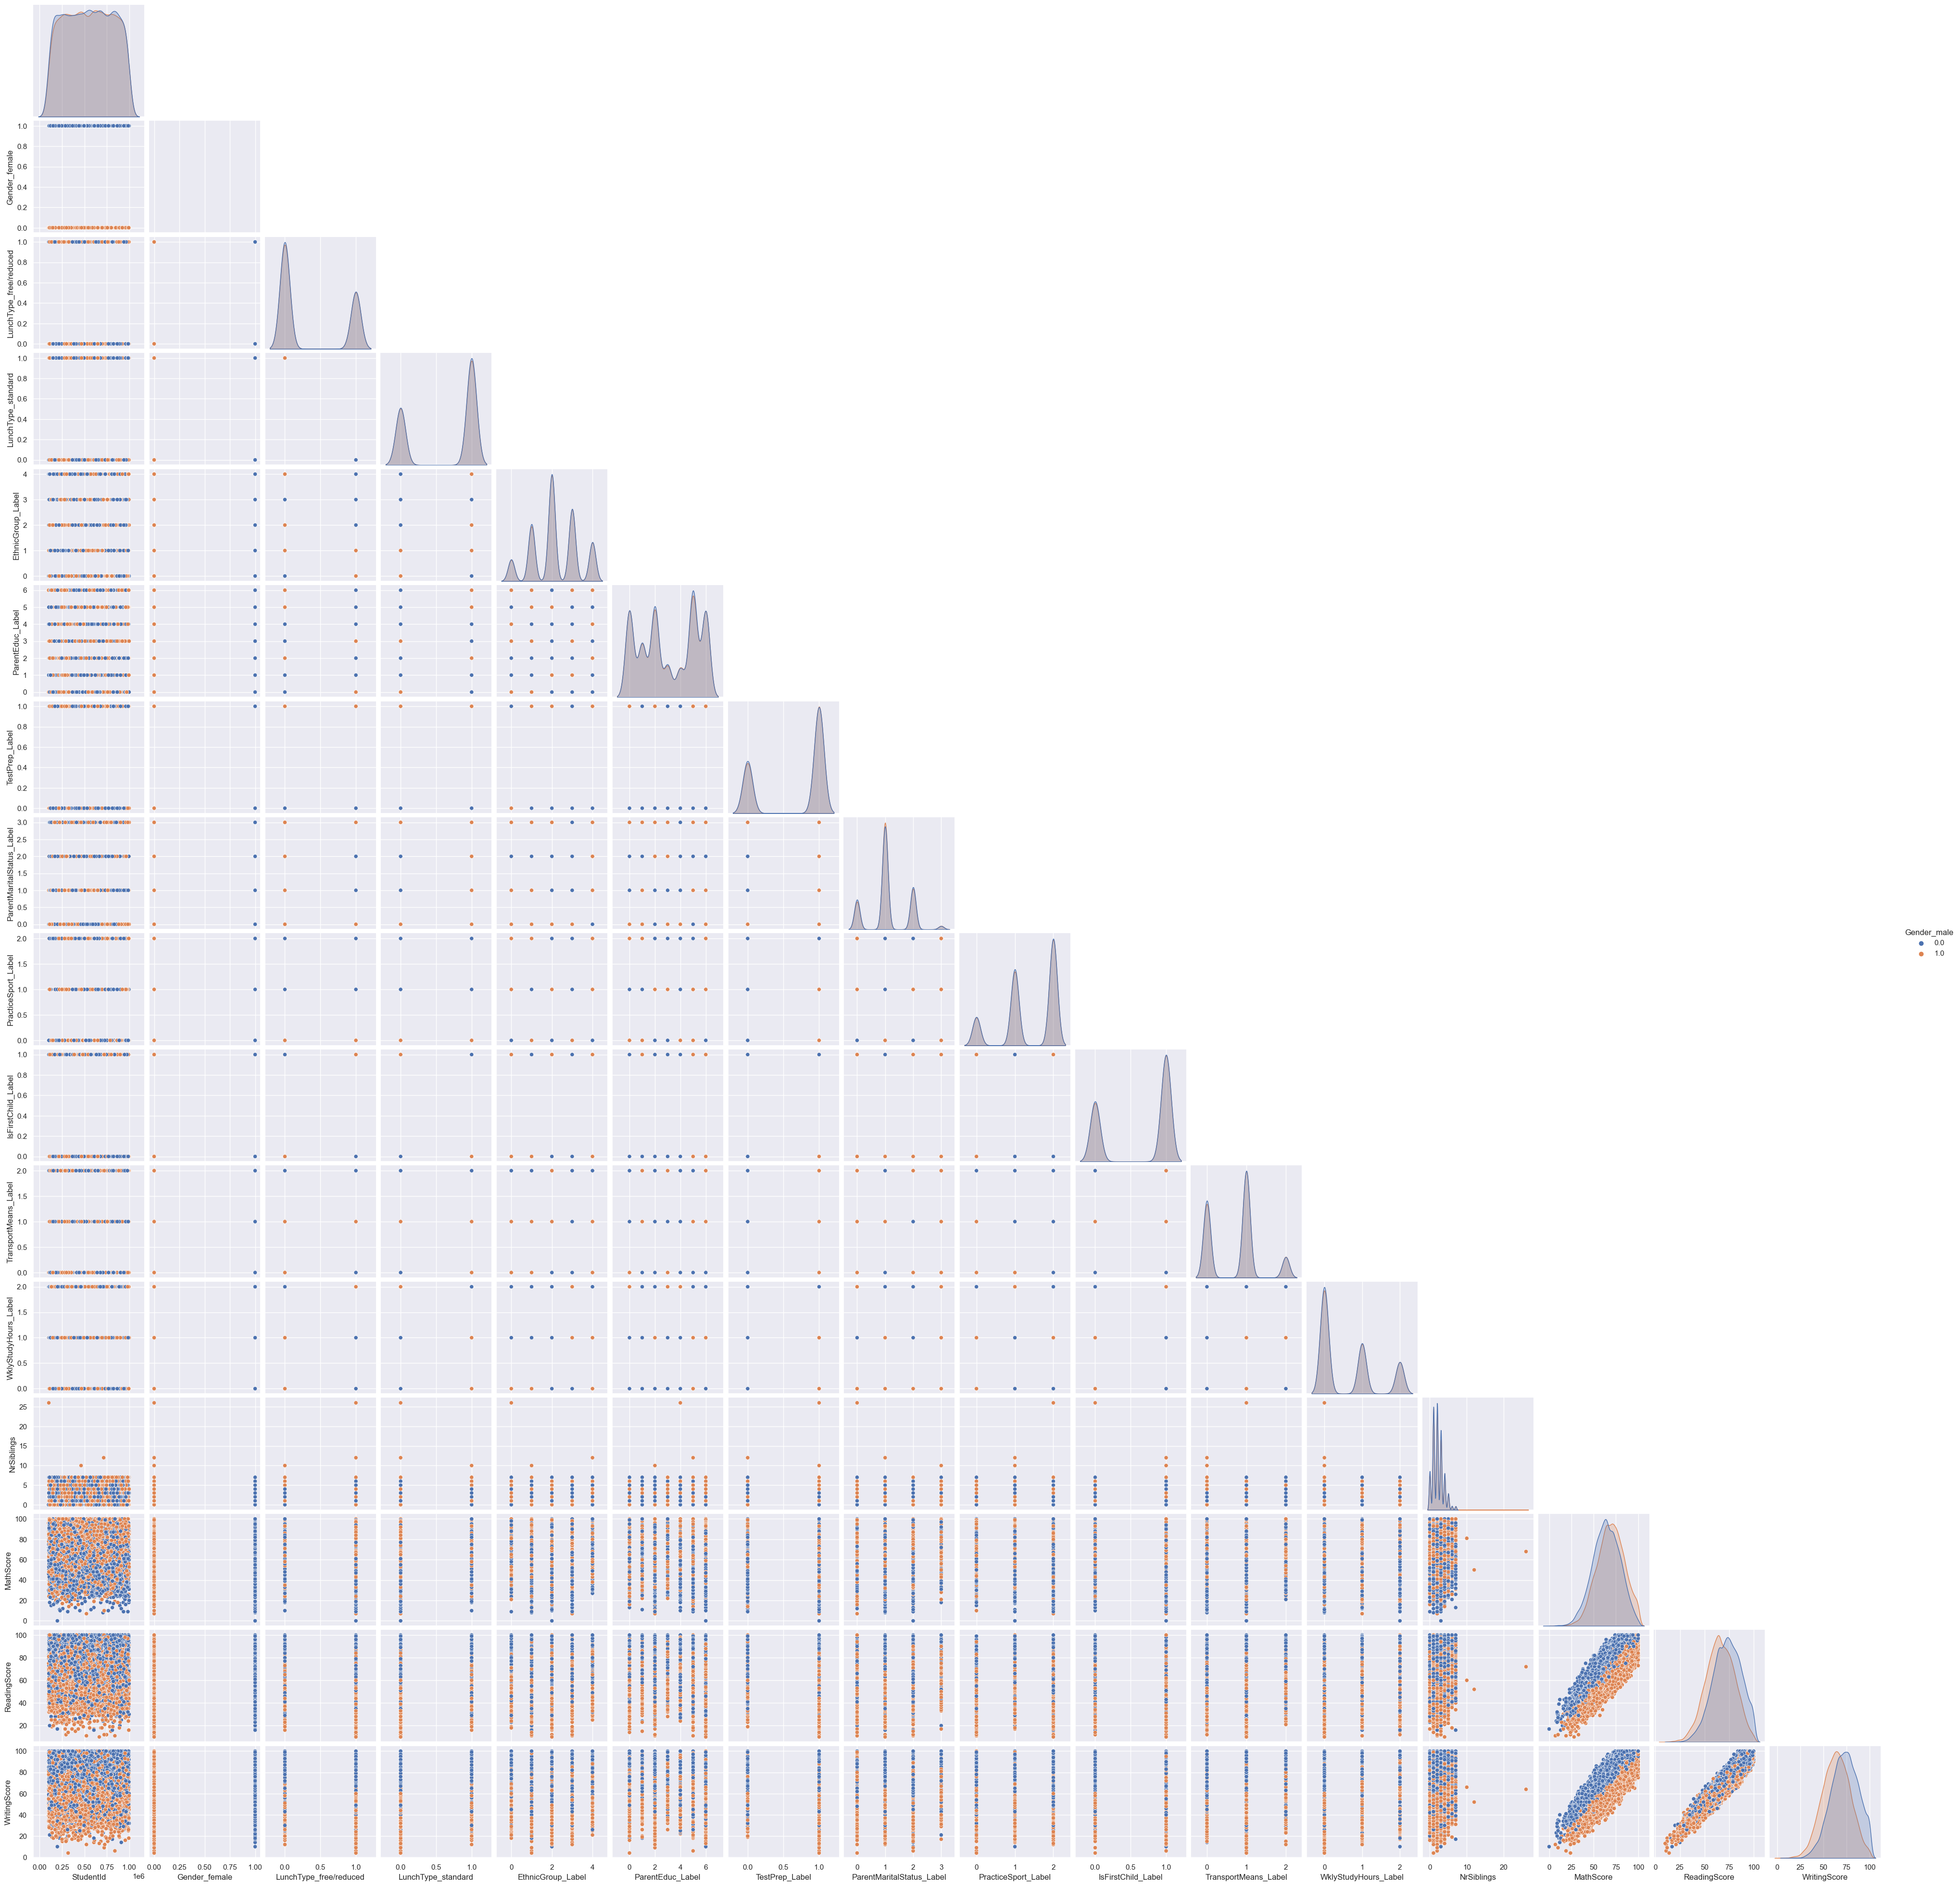

In [82]:
sns.pairplot(X_cleaned, hue="Gender_male", corner=True)

plt.show()